In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
# Load the uploaded dataset
data=pd.read_csv(r'Downloads\Amazon Sale Report.csv', encoding='latin1')

In [37]:
# Display the first few rows of the dataset
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [39]:
# Basic statistics and insights from the dataset

# Distribution of Order Status
order_status_distribution = data['Status'].value_counts(normalize=True) * 100

# Top-selling categories by sales amount
top_categories = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# Geographical sales distribution (state-level aggregation)
sales_by_state = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)

# Customer preferences for sizes
size_preferences = data['Size'].value_counts(normalize=True) * 100

# Display the results
order_status_distribution, top_categories, sales_by_state, size_preferences


(Status
 Shipped                          60.332930
 Shipped - Delivered to Buyer     22.295621
 Cancelled                        14.215048
 Shipped - Returned to Seller      1.515011
 Shipped - Picked Up               0.754404
 Pending                           0.510172
 Pending - Waiting for Pick Up     0.217870
 Shipped - Returning to Seller     0.112424
 Shipped - Out for Delivery        0.027137
 Shipped - Rejected by Buyer       0.008529
 Shipping                          0.006203
 Shipped - Lost in Transit         0.003877
 Shipped - Damaged                 0.000775
 Name: proportion, dtype: float64,
 Category
 T-shirt     39206756.65
 Shirt       21297770.08
 Blazzer     11215104.12
 Trousers     5346286.30
 Perfume       789419.66
 Name: Amount, dtype: float64,
 ship-state
 MAHARASHTRA      13340333.05
 KARNATAKA        10480694.22
 TELANGANA         6915018.08
 UTTAR PRADESH     6823947.08
 TAMIL NADU        6519182.30
 Name: Amount, dtype: float64,
 Size
 M       17.346638
 

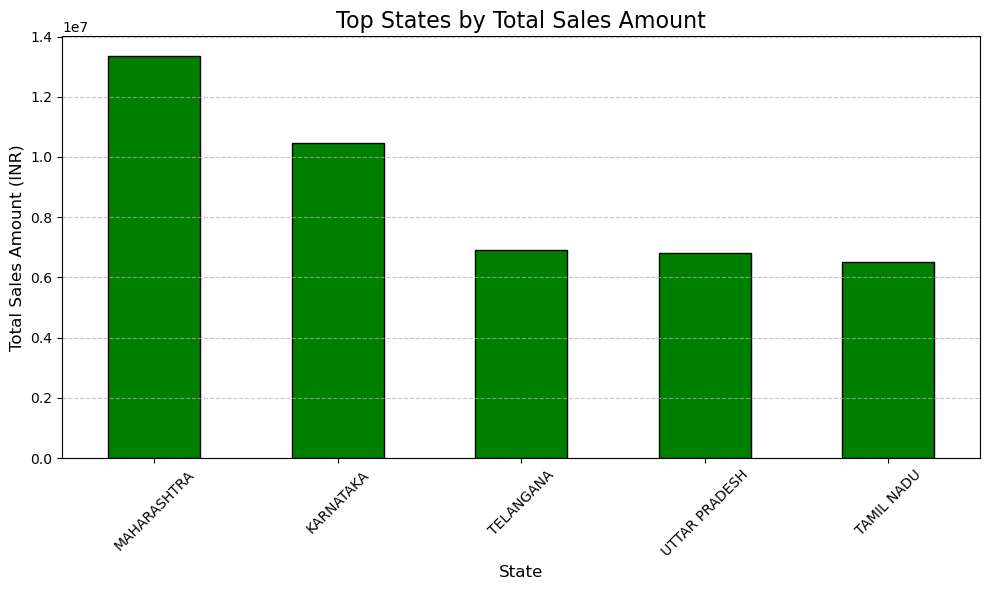

In [41]:
# Geographical Sales Distribution: Top States
plt.figure(figsize=(10, 6))
sales_by_state.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top States by Total Sales Amount', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


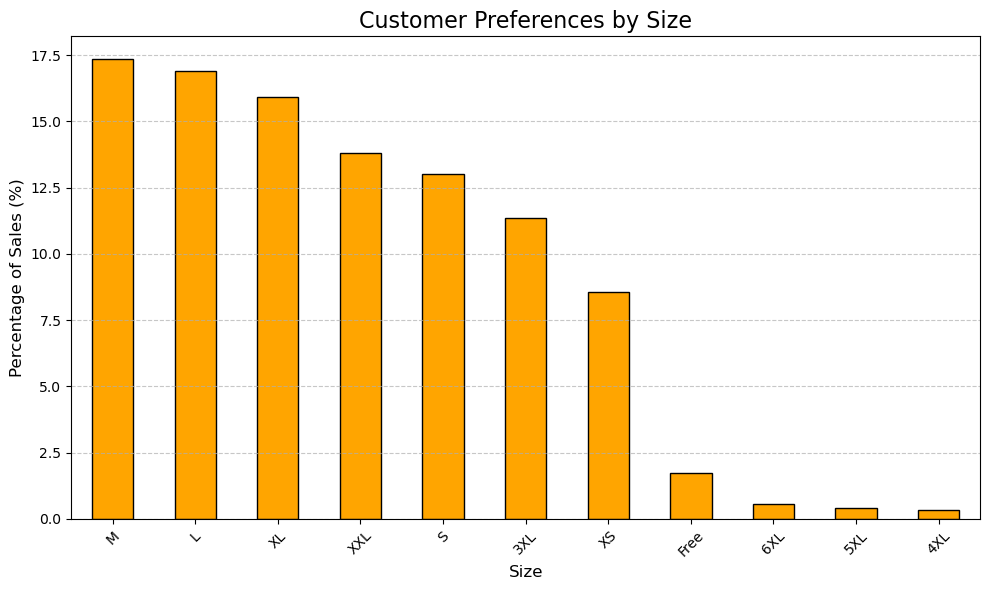

In [45]:
# Size preferences distribution
size_preferences = data['Size'].value_counts(normalize=True) * 100

# Visualization
plt.figure(figsize=(10, 6))
size_preferences.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Customer Preferences by Size', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


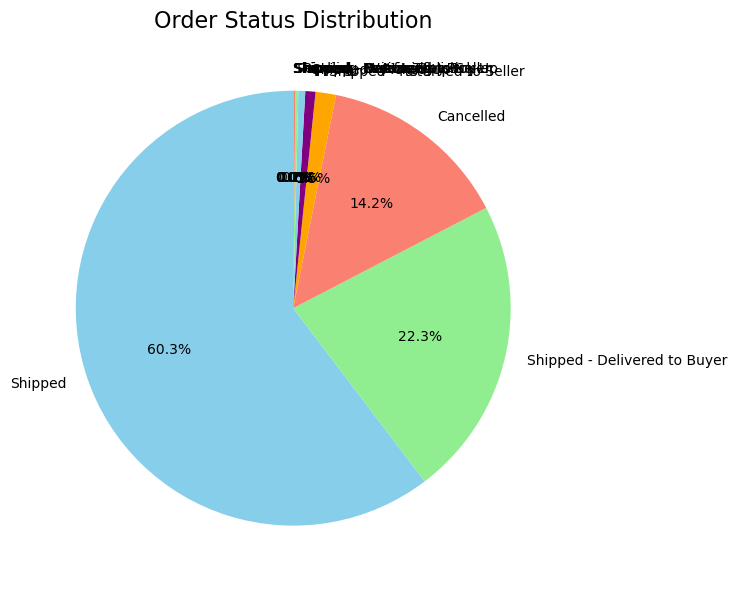

In [49]:
# Order status distribution
order_status_distribution = data['Status'].value_counts(normalize=True) * 100

# Visualization
plt.figure(figsize=(10, 6))
order_status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('Order Status Distribution', fontsize=16)
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

In [4]:
pip install matplotlib pandas  

Note: you may need to restart the kernel to use updated packages.


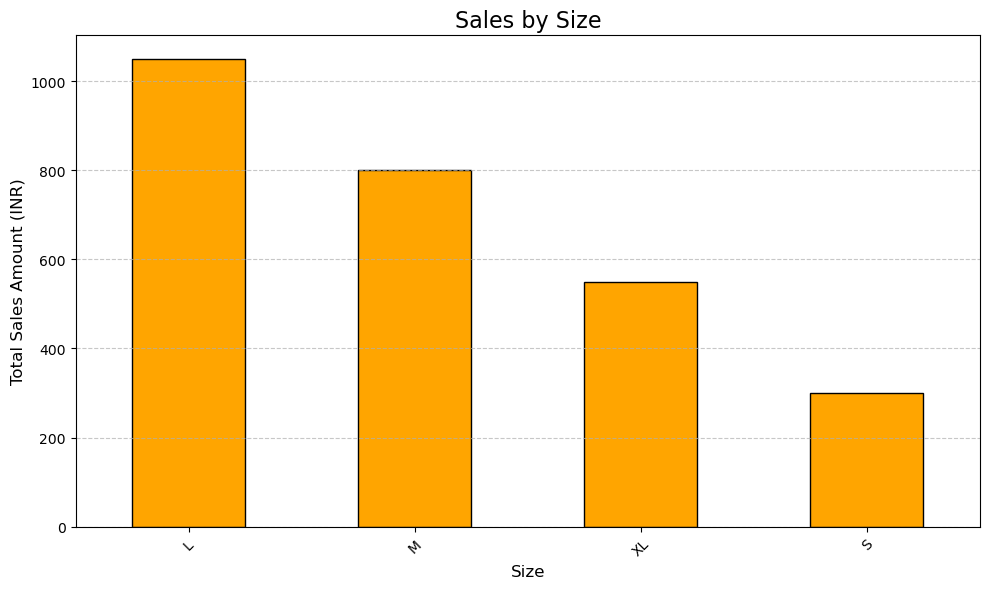

Top 3 Sizes by Sales:
Size
L     1050
M      800
XL     550
Name: Amount, dtype: int64


In [16]:
#sales by size
%matplotlib inline

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'Size': ['S', 'M', 'L', 'XL', 'M', 'S', 'L', 'XL', 'M', 'L'],
    'Amount': [200, 150, 300, 250, 400, 100, 350, 300, 250, 400]
})

# Group sales by size and calculate total sales
size_sales = data.groupby('Size')['Amount'].sum().sort_values(ascending=False)

# Plotting size-based sales
plt.figure(figsize=(10, 6))
size_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Sales by Size', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Recommendation: Reorder based on these insights
print("Top 3 Sizes by Sales:")
print(size_sales.head(3))


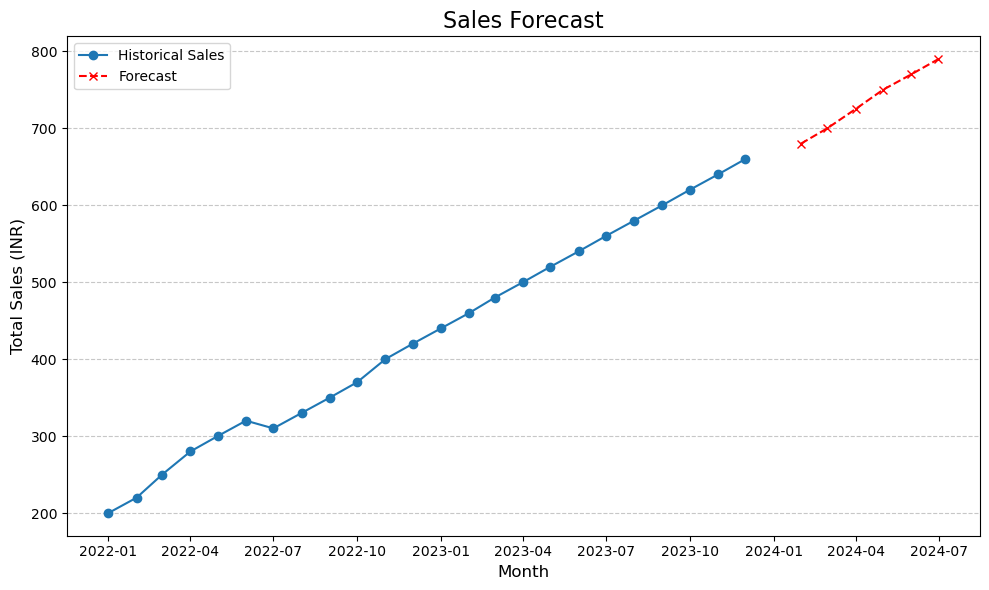

In [18]:
#sales forecast
%matplotlib inline

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=24, freq='M'),
    'Amount': [200, 220, 250, 280, 300, 320, 310, 330, 350, 370, 400, 420,
               440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660]
})

# Prepare data for forecasting: Aggregate monthly sales
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(
    monthly_sales['Total Sales'], 
    trend='add', 
    seasonal='add', 
    seasonal_periods=12
)
fit = model.fit()

# Forecast future sales
forecast = fit.forecast(steps=6)  # Predict next 6 months
forecast.index = pd.date_range(
    start=monthly_sales['Month'].iloc[-1] + pd.offsets.MonthBegin(1), 
    periods=6, 
    freq='M'
)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], label='Historical Sales', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red', marker='x')
plt.title('Sales Forecast', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (INR)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


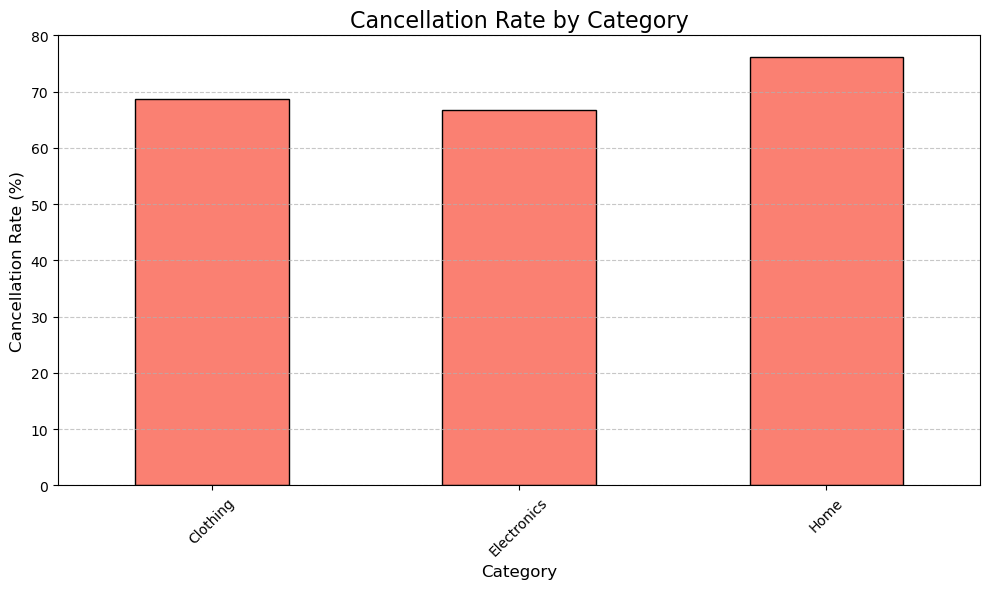

Top Categories by Cancellation Rate:
Category
Home           76.190476
Clothing       68.750000
Electronics    66.666667
Name: Amount, dtype: float64


In [20]:
#cancellation rate by category
%matplotlib inline

# Sample DataFrame for demonstration
data = pd.DataFrame({
    'Category': ['Electronics', 'Clothing', 'Clothing', 'Home', 'Electronics', 
                 'Home', 'Clothing', 'Electronics', 'Home', 'Clothing'],
    'Amount': [200, 150, 300, 250, 400, 350, 100, 300, 450, 250],
    'Status': ['Cancelled', 'Completed', 'Cancelled', 'Completed', 'Cancelled', 
               'Cancelled', 'Completed', 'Completed', 'Cancelled', 'Cancelled']
})

# Analyze cancellation rate by category
cancellations = data[data['Status'] == 'Cancelled'].groupby('Category')['Amount'].sum()
orders = data.groupby('Category')['Amount'].sum()
cancellation_rate = (cancellations / orders) * 100

# Plot cancellation rates
cancellation_rate.dropna(inplace=True)
plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Cancellation Rate by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Categories with the highest cancellation rates
print("Top Categories by Cancellation Rate:")
print(cancellation_rate.sort_values(ascending=False).head())


In [14]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.
